# 2. Perform image smoothing on an image using

    * Ideal Low pass filter (Use different cut off frequency D0=5, 15, 30, 80 )
    * Butterworth Low pass filter (same cut off frequency) of Order 2 and Order 4
    * Gaussian Low pass filter (same cut-off frequency) 

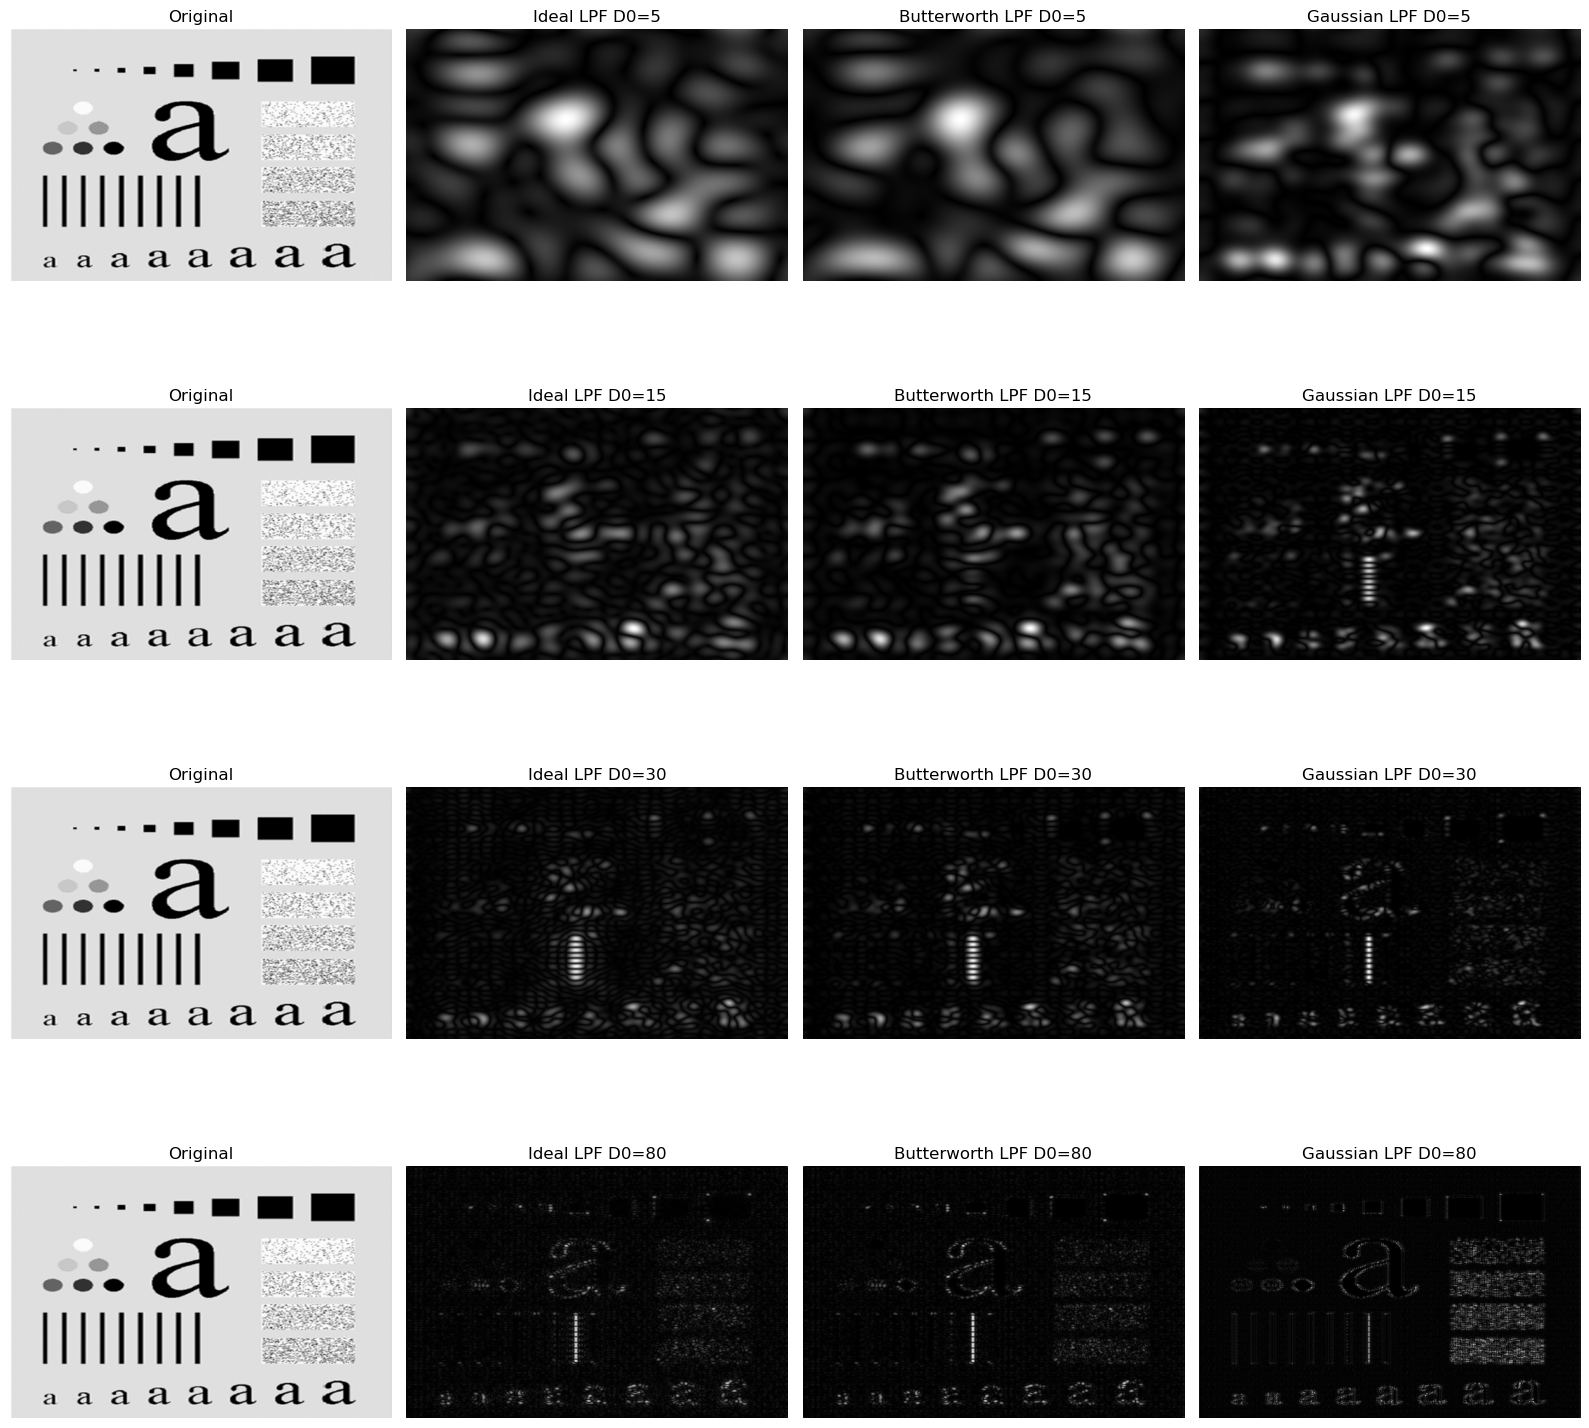

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dft_shift(img):
    dft = np.fft.fft2(img)
    return np.fft.fftshift(dft)

def idft_shift(dft_shifted):
    f_ishift = np.fft.ifftshift(dft_shifted)
    img_back = np.fft.ifft2(f_ishift)
    return np.abs(img_back)

def create_distance_matrix(shape):
    M, N = shape
    u = np.arange(M)
    v = np.arange(N)
    u[u > M//2] -= M
    v[v > N//2] -= N
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    return D

def low_pass_filter(img, D0=30):
    dft = dft_shift(img)
    D = create_distance_matrix(img.shape)
    H = np.zeros_like(img)
    H[D <= D0] = 1
    G = dft * H
    return idft_shift(G)

def butterworth_low_pass_filter(img, D0=30, n=2):
    dft = dft_shift(img)
    D = create_distance_matrix(img.shape)
    H = 1 / (1 + (D / D0)**(2 * n))
    G = dft * H
    return idft_shift(G)

def gaussian_low_pass_filter(img, D0=30):
    dft = dft_shift(img)
    D = create_distance_matrix(img.shape)
    H = np.exp(-(D**2) / (2 * (D0**2)))
    G = dft * H
    return idft_shift(G)

def read_img(path):
    img  = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found at {path}")
    return img

def plot_imgs(original, lp_imgs, blp_imgs, glp_imgs, D0_values):
    fig, axs = plt.subplots(len(D0_values), 4, figsize=(16, 4 * len(D0_values)))
    for i, D0 in enumerate(D0_values):
        axs[i, 0].imshow(original, cmap='gray')
        axs[i, 0].set_title(f"Original")
        axs[i, 1].imshow(lp_imgs[i], cmap='gray')
        axs[i, 1].set_title(f"Ideal LPF D0={D0}")
        axs[i, 2].imshow(blp_imgs[i], cmap='gray')
        axs[i, 2].set_title(f"Butterworth LPF D0={D0}")
        axs[i, 3].imshow(glp_imgs[i], cmap='gray')
        axs[i, 3].set_title(f"Gaussian LPF D0={D0}")
        for j in range(4):
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()
    
def main():
    img = read_img("../test_imgs/test_img.png")
    D0_values = [5, 15, 30, 80]
    lowpass_img = [low_pass_filter(img, D0) for D0 in D0_values]
    butterworth_lowpass_img = [butterworth_low_pass_filter(img, D0, n=4) for D0 in D0_values]
    gaussian_lowpass_img = [gaussian_low_pass_filter(img, D0) for D0 in D0_values]

    plot_imgs(img, lowpass_img, butterworth_lowpass_img, gaussian_lowpass_img, D0_values)
    
if __name__=="__main__":
    main()